In [1]:
from sklearn.datasets import load_iris

#memuat dataset iris
iris = load_iris()

#mengakses data dan target
X = iris.data
y = iris.target

#menampilkan beberapa contoh data
print ('contoh data iris: ')
for i in range (5):
  print (f'fitur: {X[i]}, label: {y[i]}')

contoh data iris: 
fitur: [5.1 3.5 1.4 0.2], label: 0
fitur: [4.9 3.  1.4 0.2], label: 0
fitur: [4.7 3.2 1.3 0.2], label: 0
fitur: [4.6 3.1 1.5 0.2], label: 0
fitur: [5.  3.6 1.4 0.2], label: 0


In [2]:
import pandas as pd
from sklearn.datasets import load_iris
import graphviz
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split

#memuat dataset iris
iris = load_iris()

#membuat dataframe dari dataset iris
iris_df = pd.DataFrame (data=iris.data, columns = iris.feature_names)
iris_df ['target'] = iris.target

#menampilkan beberapa baris pertama dataframe
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [4]:
#menampilkan nilai unik pada kolom target

unique_target = iris_df['target'].unique()
print ("Nilai unik pada kolom target: ")
print (unique_target)

Nilai unik pada kolom target: 
[0 1 2]


In [5]:
# Menentukan kolom atribut (fitur)
x = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]

# Menentukan kolom target
y = iris_df ['target']

In [6]:
#membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state =42)

In [7]:
#membuat dan melatih model decision tree

model = DecisionTreeClassifier (random_state = 42)
model.fit (X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [8]:
#membuat prediksi pada data uji

y_pred = model.predict (X_test)

In [9]:
#menghitung akurasi

accuracy = accuracy_score (y_test, y_pred)
print (f'Akurasi model: {accuracy*100:.2f}%')

Akurasi model: 100.00%


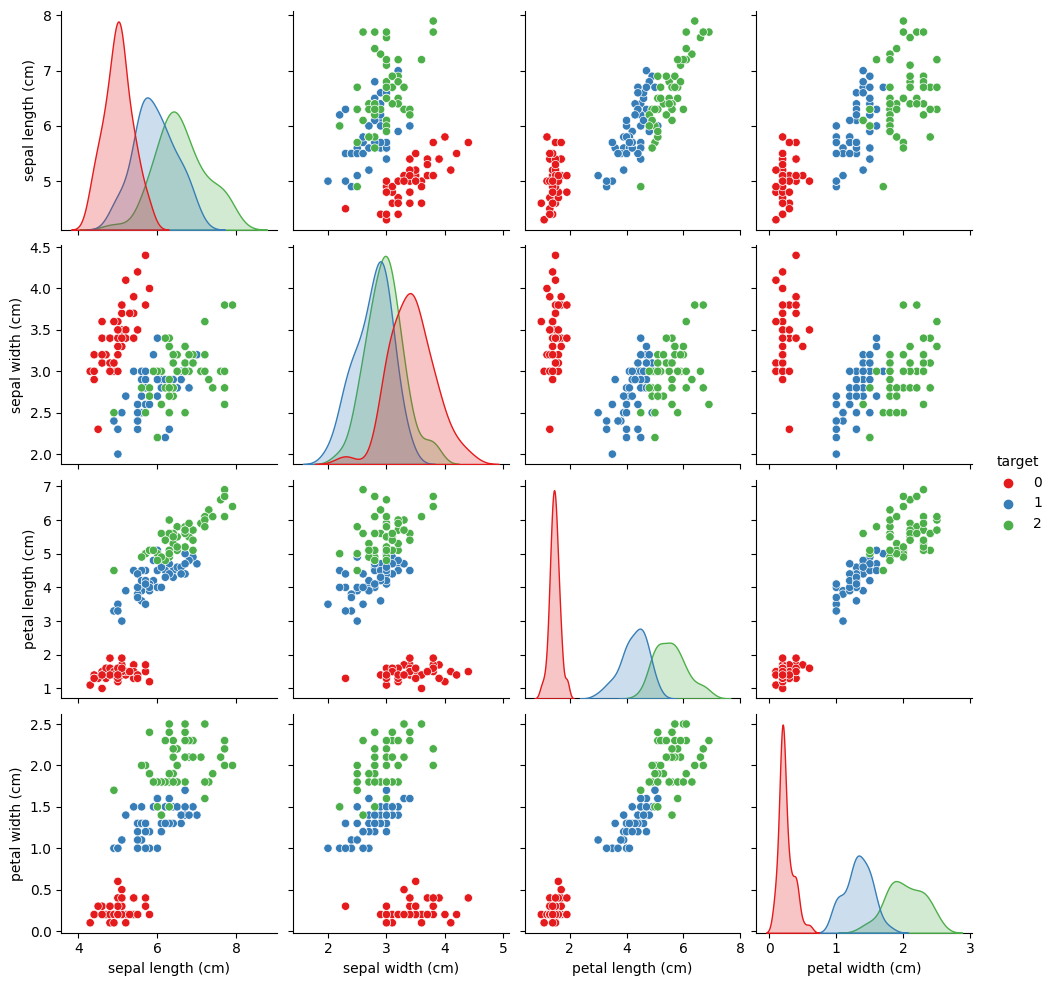

In [10]:
# Menggabungkan atribut dan target menjadi satu dataframe
iris_data = iris_df.copy()
iris_data['target'] = iris.target

# Membuat pair plot
sns.pairplot(iris_data, hue='target', palette='Set1')
plt.show()

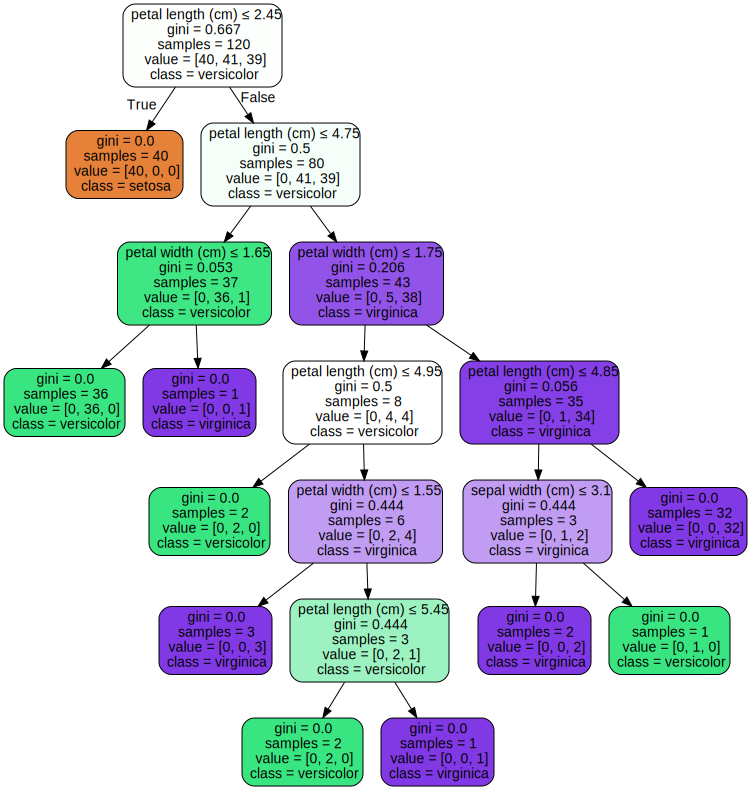

In [11]:
# Export decision tree dalam format teks
tree_rules = export_text(model, feature_names=iris.feature_names)

# Export decision tree dalam format .dot
dot_data = export_graphviz(model, out_file=None,
                           feature_names=iris.feature_names,
                           class_names=iris.target_names,
                           filled=True, rounded=True,
                           special_characters=True)

# Membuat grafik dari file .dot
graph = graphviz.Source(dot_data)
graph.render('iris_decision_tree', format='png')  # Menyimpan grafik dalam format PNG

# Menampilkan grafik
graph

In [12]:
X_data = range(10)
y_data = range(10)

# Ketika random_state ditentukan
print("random_state ditentukan")
for i in range(3):
    # Membagi data menjadi data latih dan data uji dengan random state = 42
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 42)
    # Menampilkan data uji (y_test)
    print(y_test)

# Ketika random_state tidak ditentukan
print("random_state tidak ditentukan")
for i in range(3):
# Membagi data menjadi data latih dan data uji tanpa random state
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = None)
# Menampilkan data uji (y_test)
    print(y_test)

random_state ditentukan
[8, 1, 5]
[8, 1, 5]
[8, 1, 5]
random_state tidak ditentukan
[5, 6, 8]
[8, 7, 2]
[1, 4, 0]
